# `Credit Card ANN`

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [82]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [84]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [85]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [86]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [87]:
X = data.drop('Class',axis=1)
y = data['Class']

### Oversampling do to balance the data

In [88]:
import sklearn
sklearn.__version__

'1.0.2'

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [91]:
y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [2.00735965e-01, 9.30877515e-01, 7.97583642e-01, ...,
        4.27401523e-01, 3.13259624e-01, 2.71375732e-03],
       [5.32976100e-01, 9.37572247e-01, 8.03236980e-01, ...,
        4.20875462e-01, 3.15980336e-01, 5.25136613e-03],
       [1.46935772e-01, 9.20781516e-01, 7.97859882e-01, ...,
        4.22665602e-01, 3.16123847e-01, 8.50807280e-04]])

In [93]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

### `Model`

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [96]:
model = Sequential()   # constructor which initiate your tensorflow
model.add(Dense(24, input_dim=30, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))  # input + Hidden layer 1,feature extractor 
model.add(Dense(12, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))  # feature extractor, Hidden layer 2
model.add(Dense(6, activation='LeakyReLU'))   # feature extractor, Hidden layer 3
model.add(Dense(1, activation='sigmoid'))   # output layer
# number of class you want to predict

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                744       
                                                                 
 dense_13 (Dense)            (None, 12)                300       
                                                                 
 dense_14 (Dense)            (None, 6)                 78        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_val, y_val))

Epoch 1/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.2907 - accuracy: 0.9594 - val_loss: 0.1078 - val_accuracy: 0.9759
Epoch 2/10
4095/4095 [==============================] - 10s 2ms/step - loss: 0.1862 - accuracy: 0.9637 - val_loss: 0.0742 - val_accuracy: 0.9758
Epoch 3/10
4095/4095 [==============================] - 10s 2ms/step - loss: 0.3989 - accuracy: 0.9574 - val_loss: 0.3537 - val_accuracy: 0.8820
Epoch 4/10
4095/4095 [==============================] - 10s 2ms/step - loss: 0.1446 - accuracy: 0.9654 - val_loss: 0.0668 - val_accuracy: 0.9778
Epoch 5/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.1189 - accuracy: 0.9670 - val_loss: 0.0663 - val_accuracy: 0.9772
Epoch 6/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.1012 - accuracy: 0.9703 - val_loss: 0.0707 - val_accuracy: 0.9769
Epoch 7/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0927 - accuracy: 0.9698 - val_loss: 0.0647 - val_ac

In [103]:
# loss_function,accuracy = model.evaluate(X,y)

In [110]:
history.history

{'loss': [0.2906797528266907,
  0.1861548125743866,
  0.3989313244819641,
  0.1445891261100769,
  0.11887966096401215,
  0.10118349641561508,
  0.09266715496778488,
  0.09745549410581589,
  0.09382205456495285,
  0.08662411570549011],
 'accuracy': [0.9593662023544312,
  0.9637065529823303,
  0.9573633670806885,
  0.9654017090797424,
  0.9669844508171082,
  0.9702574014663696,
  0.9698373079299927,
  0.9709290862083435,
  0.9704504013061523,
  0.9715617299079895],
 'val_loss': [0.10782500356435776,
  0.07424710690975189,
  0.35370010137557983,
  0.06683266907930374,
  0.06629873812198639,
  0.07073714584112167,
  0.06469278037548065,
  0.07436069846153259,
  0.0657905638217926,
  0.06853131204843521],
 'val_accuracy': [0.9759169220924377,
  0.9758387804031372,
  0.8819977641105652,
  0.9778220653533936,
  0.977157711982727,
  0.9769232273101807,
  0.9776071310043335,
  0.9743439555168152,
  0.9765617251396179,
  0.9772260785102844]}

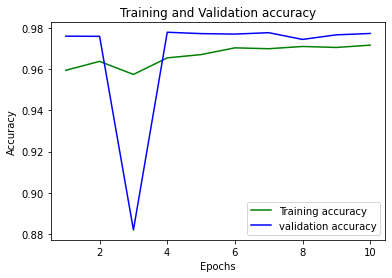

In [111]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

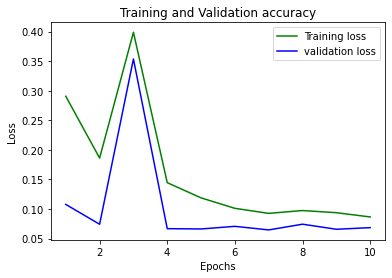

In [116]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [113]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
rounded = [round(x[0]) for x in y_pred]

In [ ]:
print(rounded)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
mat = confusion_matrix(rounded,y_test)
mat

## 97.16% accuracy
## 97.92% validation accuracy
# `END -----------------------------------------------------`